# Phase-3 SQL tasks
## 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

## 3.1 solution

Importing CSV file into MYSQL Workbench process
>> Go to any Database right click << Table Data import Wizard << Browse << Give CSV file << next << next<< next << finish

**Check table is created with the data**

select*
from 42_district_wise_crimes_committed_against_women_2001_2012;

**Changing the table name for suitable**

ALTER TABLE 42_district_wise_crimes_committed_against_women_2001_2012
 RENAME TO crimes_against_women;

**Changing the Columns names**
ALTER TABLE crimes_against_women CHANGE `STATE/UT` state VARCHAR(500);

**Checked Name is checked or not**
select*
from crimes_against_women;


DESCRIBE crimes_against_women;

**Changing the Columns names**
ALTER TABLE crimes_against_women CHANGE `Kidnapping_and_Abduction` Kidnapping VARCHAR(500);

**Checked Name is checked or not**
select*
from crimes_against_women;

## 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.

## 3.2 solution

SELECT state, district, Year, MAX(Rape) AS max_rapes, MAX(Kidnapping) AS max_kidnappings
FROM crimes_against_women
GROUP BY state, district, Year;

## Another Solution

SELECT c.state, c.district, c.Year, c.Rape AS max_rapes, c.Kidnapping AS max_kidnappings
FROM crimes_against_women c
INNER JOIN (
    SELECT state, district, Year, MAX(Rape) AS max_rapes, MAX(Kidnapping) AS max_kidnappings
    FROM crimes_against_women
    GROUP BY state, district, Year
) AS max_values ON c.state = max_values.state
                AND c.district = max_values.district
                AND c.Year = max_values.Year
                AND (c.Rape = max_values.max_rapes OR c.Kidnapping = max_values.max_kidnappings);

## 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.

## 3.3 solutions

SELECT state, district, Year, MIN(Rape) AS min_rapes, MIN(Kidnapping) AS min_kidnappings
FROM crimes_against_women
GROUP BY state, district, Year;

### Another solution
SELECT c.state, c.district, c.Year, c.Rape AS min_rapes, c.Kidnapping AS min_kidnappings
FROM crimes_against_women c
INNER JOIN (
    SELECT state, district, Year, MIN(Rape) AS min_rapes, MIN(Kidnapping) AS min_kidnappings
    FROM crimes_against_women
    GROUP BY state, district, Year
) AS min_values ON c.state = min_values.state
                AND c.district = min_values.district
                AND c.Year = min_values.Year
                AND (c.Rape = min_values.min_rapes OR c.Kidnapping = min_values.min_kidnappings);

## 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

### 3.4 Solution

Importing CSV file into MYSQL Workbench process
>> Go to any Database right click << Table Data import Wizard << Browse << Give CSV file << next << next<< next << finish

SELECT * FROM 02_01_district_wise_crimes_committed_against_sc_2001_2012;

**Changing the Table name for suitable**

ALTER TABLE 02_01_district_wise_crimes_committed_against_sc_2001_2012
RENAME TO crimes_against_st_districts;


##3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

### Solution

SELECT
    district,
    MAX(dacoity) AS highest_dacoity,
    MAX(robbery) AS highest_robbery
FROM
    crimes_against_st_districts
WHERE
    district <> 'Total'
GROUP BY
    district
ORDER BY
    highest_dacoity DESC,
    highest_robbery DESC
LIMIT 1;


## 3.6  Write SQL query to find in which districts(All) the lowest number of murders happened.

### Solution

SELECT
    district
FROM
    crimes_against_st_districts
WHERE
    Murder = (
        SELECT
            MIN(Murder)
        FROM
            crimes_against_st_districts
    );



### 3.7	Write SQL query to find the number of murders in ascending order in district and year wise.

### Solutions

SELECT
    district,
    year,
    murder
FROM
    crimes_against_st_districts
ORDER BY
    district ASC,
    year ASC,
    murder ASC;


## 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

### Solution

Importing CSV file into MYSQL Workbench process
>> Go to any Database right click << Table Data import Wizard << Browse << Give CSV file << next <<Give New table name  next << tick the source columns which one you want next  << finish

**Check your table exist or not**

SELECT * FROM ipc_crime_stats_districts_2001_to_2012;


## 3.8.2 Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

### Solution

WITH ranked_murders AS (
    SELECT `STATE/UT` AS STATE_UT,
           YEAR,
           DISTRICT,
           MURDER,
           ROW_NUMBER() OVER (PARTITION BY `STATE/UT`, YEAR ORDER BY MURDER DESC) AS rn
    FROM ipc_crime_stats_districts_2001_to_2012
)
SELECT STATE_UT, YEAR, DISTRICT, MURDER
FROM ranked_murders
WHERE rn = 1;





## 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.

In [1]:
import pandas as pd
# Define Data
data = [
('A & N ISLANDS', 2001, 'ANDAMAN', 13),
('A & N ISLANDS', 2002, 'ANDAMAN', 14),
('A & N ISLANDS', 2003, 'ANDAMAN', 16),
('A & N ISLANDS', 2004, 'ANDAMAN', 13),
('A & N ISLANDS', 2005, 'ANDAMAN', 14),
('A & N ISLANDS', 2006, 'ANDAMAN', 3),
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15),
('A & N ISLANDS', 2008, 'ANDAMAN', 8),
('A & N ISLANDS', 2009, 'ANDAMAN', 15),
('A & N ISLANDS', 2010, 'ANDAMAN', 8),
('A & N ISLANDS', 2011, 'ANDAMAN', 14),
('A & N ISLANDS', 2012, 'SOUTH', 8),
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214),
('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214),
('ANDHRA PRADESH', 2003, 'GUNTUR', 210),
('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183),
('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212),
('ANDHRA PRADESH', 2006, 'CYBERABAD', 193),
('ANDHRA PRADESH', 2007, 'CYBERABAD', 186),
('ANDHRA PRADESH', 2008, 'CYBERABAD', 197),
('ANDHRA PRADESH', 2009, 'CYBERABAD', 186),
('ANDHRA PRADESH', 2010, 'CYBERABAD', 187),
('ANDHRA PRADESH', 2011, 'CYBERABAD', 213),
('ANDHRA PRADESH', 2012, 'CYBERABAD', 198),
('ARUNACHAL PRADESH', 2001, 'LOHIT', 16),
('ARUNACHAL PRADESH', 2002, 'LOHIT', 14),
('ARUNACHAL PRADESH', 2003, 'LOHIT', 16),
('ARUNACHAL PRADESH', 2004, 'SUBANSIRI UPPER', 10),
('ARUNACHAL PRADESH', 2005, 'LOHIT', 14),
('ARUNACHAL PRADESH', 2006, 'PAPUM PARE', 10),
('ARUNACHAL PRADESH', 2007, 'LOHIT', 17),
('ARUNACHAL PRADESH', 2008, 'PAPUM PARE', 11),
('ARUNACHAL PRADESH', 2009, 'SIANG WEST', 11),
('ARUNACHAL PRADESH', 2010, 'SIANG WEST', 9),
('ARUNACHAL PRADESH', 2011, 'LOHIT', 12),
('ARUNACHAL PRADESH', 2012, 'LOHIT', 11),
('ASSAM', 2001, 'DIBRUGARH', 110),
('ASSAM', 2002, 'TINSUKIA', 115),
('ASSAM', 2003, 'DIBRUGARH', 107),
('ASSAM', 2004, 'DIBRUGARH', 125),
('ASSAM', 2005, 'DIBRUGARH', 113),
('ASSAM', 2006, 'DIBRUGARH', 104),
('ASSAM', 2007, 'TINSUKIA', 143),
('ASSAM', 2008, 'TINSUKIA', 114),
('ASSAM', 2009, 'SONITPUR', 109),
('ASSAM', 2010, 'TINSUKIA', 96),
('ASSAM', 2011, 'TINSUKIA', 98),
('ASSAM', 2012, 'KOKRAJHAR', 110),
('BIHAR', 2001, 'PATNA', 434),
('BIHAR', 2002, 'PATNA', 472),
('BIHAR', 2003, 'PATNA', 484),
('BIHAR', 2004, 'PATNA', 542),
('BIHAR', 2005, 'PATNA', 436),
('BIHAR', 2006, 'PATNA', 338),
('BIHAR', 2007, 'PATNA', 317),
('BIHAR', 2008, 'PATNA', 341),
('BIHAR', 2009, 'PATNA', 314),
('BIHAR', 2010, 'PATNA', 304),
('BIHAR', 2011, 'PATNA', 248),
('BIHAR', 2012, 'PATNA', 356),
('CHANDIGARH', 2001, 'CHANDIGARH', 15),
('CHANDIGARH', 2002, 'CHANDIGARH', 31),
('CHANDIGARH', 2003, 'CHANDIGARH', 26),
('CHANDIGARH', 2004, 'CHANDIGARH', 24),
('CHANDIGARH', 2005, 'CHANDIGARH', 17),
('CHANDIGARH', 2006, 'CHANDIGARH', 26),
('CHANDIGARH', 2007, 'CHANDIGARH', 23),
('CHANDIGARH', 2008, 'CHANDIGARH', 18),
('CHANDIGARH', 2009, 'CHANDIGARH', 15),
('CHANDIGARH', 2010, 'CHANDIGARH', 18),
('CHANDIGARH', 2011, 'CHANDIGARH', 19),
('CHANDIGARH', 2012, 'CHANDIGARH', 22),
('CHHATTISGARH', 2001, 'RAIPUR', 117),
('CHHATTISGARH', 2002, 'RAIPUR', 129),
('CHHATTISGARH', 2003, 'RAIPUR', 133),
('CHHATTISGARH', 2004, 'RAIPUR', 148),
('CHHATTISGARH', 2005, 'RAIPUR', 142),
('CHHATTISGARH', 2006, 'RAIPUR', 118),
('CHHATTISGARH', 2007, 'RAIPUR', 136),
('CHHATTISGARH', 2008, 'RAIPUR', 131),
('CHHATTISGARH', 2009, 'RAIPUR', 136),
('CHHATTISGARH', 2010, 'RAIPUR', 122),
('CHHATTISGARH', 2011, 'RAIPUR', 122),
('CHHATTISGARH', 2012, 'RAIPUR', 134),
('D & N HAVELI', 2001, 'DADRA AND NAGAR HAVELI', 10),
('D & N HAVELI', 2002, 'DADRA AND NAGAR HAVELI', 12),
('D & N HAVELI', 2003, 'DADRA AND NAGAR HAVELI', 8),
('D & N HAVELI', 2004, 'DADRA AND NAGAR HAVELI', 10),
('D & N HAVELI', 2005, 'DADRA AND NAGAR HAVELI', 9),
('D & N HAVELI', 2006, 'DADRA AND NAGAR HAVELI', 8),
('D & N HAVELI', 2007, 'DADRA AND NAGAR HAVELI', 7),
('D & N HAVELI', 2008, 'DADRA AND NAGAR HAVELI', 8),
('D & N HAVELI', 2009, 'DADRA AND NAGAR HAVELI', 8),
('D & N HAVELI', 2010, 'DADRA AND NAGAR HAVELI', 9),
('D & N HAVELI', 2011, 'DADRA AND NAGAR HAVELI', 8),
('D & N HAVELI', 2012, 'DADRA AND NAGAR HAVELI', 10),
('DAMAN & DIU', 2001, 'DAMAN', 9),
('DAMAN & DIU', 2002, 'DAMAN', 9),
('DAMAN & DIU', 2003, 'DAMAN', 11),
('DAMAN & DIU', 2004, 'DAMAN', 7),
('DAMAN & DIU', 2005, 'DAMAN', 8),
('DAMAN & DIU', 2006, 'DAMAN', 11),
('DAMAN & DIU', 2007, 'DAMAN', 9),
('DAMAN & DIU', 2008, 'DAMAN', 10),
('DAMAN & DIU', 2009, 'DAMAN', 7),
('DAMAN & DIU', 2010, 'DAMAN', 9),
('DAMAN & DIU', 2011, 'DAMAN', 7),
('DAMAN & DIU', 2012, 'DAMAN', 9),
('DELHI UT', 2001, 'NORTH', 461),
('DELHI UT', 2002, 'NORTH', 516),
('DELHI UT', 2003, 'NORTH', 525),
('DELHI UT', 2004, 'NORTH', 519),
('DELHI UT', 2005, 'NORTH', 523),
('DELHI UT', 2006, 'NORTH', 565),
('DELHI UT', 2007, 'NORTH', 617),
('DELHI UT', 2008, 'NORTH', 570),
('DELHI UT', 2009, 'NORTH', 484),
('DELHI UT', 2010, 'NORTH', 471),
('DELHI UT', 2011, 'NORTH', 453),
('DELHI UT', 2012, 'NORTH', 479),
('GOA', 2001, 'NORTH', 46),
('GOA', 2002, 'NORTH', 35),
('GOA', 2003, 'NORTH', 40),
('GOA', 2004, 'NORTH', 31),
('GOA', 2005, 'NORTH', 37),
('GOA', 2006, 'NORTH', 36),
('GOA', 2007, 'NORTH', 36),
('GOA', 2008, 'NORTH', 41),
('GOA', 2009, 'NORTH', 46),
('GOA', 2010, 'NORTH', 36),
('GOA', 2011, 'NORTH', 43),
('GOA', 2012, 'NORTH', 45),
('GUJARAT', 2001, 'AHMEDABAD', 456),
('GUJARAT', 2002, 'AHMEDABAD', 428),
('GUJARAT', 2003, 'AHMEDABAD', 406),
('GUJARAT', 2004, 'AHMEDABAD', 401),
('GUJARAT', 2005, 'AHMEDABAD', 377),
('GUJARAT', 2006, 'AHMEDABAD', 404),
('GUJARAT', 2007, 'AHMEDABAD', 414),
('GUJARAT', 2008, 'AHMEDABAD', 396),
('GUJARAT', 2009, 'AHMEDABAD', 357),
('GUJARAT', 2010, 'AHMEDABAD', 341),
('GUJARAT', 2011, 'AHMEDABAD', 365),
('GUJARAT', 2012, 'AHMEDABAD', 389),
('HARYANA', 2001, 'FARIDABAD', 163),
('HARYANA', 2002, 'FARIDABAD', 164),
('HARYANA', 2003, 'FARIDABAD', 178),
('HARYANA', 2004, 'FARIDABAD', 155),
('HARYANA', 2005, 'FARIDABAD', 165),
('HARYANA', 2006, 'FARIDABAD', 143),
('HARYANA', 2007, 'FARIDABAD', 140),
('HARYANA', 2008, 'FARIDABAD', 145),
('HARYANA', 2009, 'FARIDABAD', 125),
('HARYANA', 2010, 'FARIDABAD', 133),
('HARYANA', 2011, 'FARIDABAD', 139),
('HARYANA', 2012, 'FARIDABAD', 152),
('HIMACHAL PRADESH', 2001, 'SOLAN', 63),
('HIMACHAL PRADESH', 2002, 'SOLAN', 67),
('HIMACHAL PRADESH', 2003, 'SOLAN', 55),
('HIMACHAL PRADESH', 2004, 'SOLAN', 49),
('HIMACHAL PRADESH', 2005, 'SOLAN', 62),
('HIMACHAL PRADESH', 2006, 'SOLAN', 49),
('HIMACHAL PRADESH', 2007, 'SOLAN', 55),
('HIMACHAL PRADESH', 2008, 'SOLAN', 56),
('HIMACHAL PRADESH', 2009, 'SOLAN', 56),
('HIMACHAL PRADESH', 2010, 'SOLAN', 55),
('HIMACHAL PRADESH', 2011, 'SOLAN', 59),
('HIMACHAL PRADESH', 2012, 'SOLAN', 57),
('JAMMU & KASHMIR', 2001, 'JAMMU', 129),
('JAMMU & KASHMIR', 2002, 'JAMMU', 122),
('JAMMU & KASHMIR', 2003, 'JAMMU', 121),
('JAMMU & KASHMIR', 2004, 'JAMMU', 121),
('JAMMU & KASHMIR', 2005, 'JAMMU', 130),
('JAMMU & KASHMIR', 2006, 'JAMMU', 127),
('JAMMU & KASHMIR', 2007, 'JAMMU', 128),
('JAMMU & KASHMIR', 2008, 'JAMMU', 121),
('JAMMU & KASHMIR', 2009, 'JAMMU', 121),
('JAMMU & KASHMIR', 2010, 'JAMMU', 120),
('JAMMU & KASHMIR', 2011, 'JAMMU', 122),
('JAMMU & KASHMIR', 2012, 'JAMMU', 121),
('JHARKHAND', 2001, 'DHANBAD', 211),
('JHARKHAND', 2002, 'DHANBAD', 199),
('JHARKHAND', 2003, 'DHANBAD', 189),
('JHARKHAND', 2004, 'DHANBAD', 186),
('JHARKHAND', 2005, 'DHANBAD', 188),
('JHARKHAND', 2006, 'DHANBAD', 160),
('JHARKHAND', 2007, 'DHANBAD', 171),
('JHARKHAND', 2008, 'DHANBAD', 160),
('JHARKHAND', 2009, 'DHANBAD', 156),
('JHARKHAND', 2010, 'DHANBAD', 151),
('JHARKHAND', 2011, 'DHANBAD', 156),
('JHARKHAND', 2012, 'DHANBAD', 160),
('KARNATAKA', 2001, 'BANGALORE', 254),
('KARNATAKA', 2002, 'BANGALORE', 263),
('KARNATAKA', 2003, 'BANGALORE', 278),
('KARNATAKA', 2004, 'BANGALORE', 274),
('KARNATAKA', 2005, 'BANGALORE', 259),
('KARNATAKA', 2006, 'BANGALORE', 265),
('KARNATAKA', 2007, 'BANGALORE', 272),
('KARNATAKA', 2008, 'BANGALORE', 263),
('KARNATAKA', 2009, 'BANGALORE', 258),
('KARNATAKA', 2010, 'BANGALORE', 255),
('KARNATAKA', 2011, 'BANGALORE', 241),
('KARNATAKA', 2012, 'BANGALORE', 238),
('KERALA', 2001, 'ERNAKULAM', 125),
('KERALA', 2002, 'ERNAKULAM', 134),
('KERALA', 2003, 'ERNAKULAM', 123),
('KERALA', 2004, 'ERNAKULAM', 129),
('KERALA', 2005, 'ERNAKULAM', 132),
('KERALA', 2006, 'ERNAKULAM', 128),
('KERALA', 2007, 'ERNAKULAM', 122),
('KERALA', 2008, 'ERNAKULAM', 125),
('KERALA', 2009, 'ERNAKULAM', 117),
('KERALA', 2010, 'ERNAKULAM', 115),
('KERALA', 2011, 'ERNAKULAM', 115),
('KERALA', 2012, 'ERNAKULAM', 119),
('LAKSHADWEEP', 2001, 'LAKSHADWEEP', 1),
('LAKSHADWEEP', 2002, 'LAKSHADWEEP', 2),
('LAKSHADWEEP', 2003, 'LAKSHADWEEP', 2),
('LAKSHADWEEP', 2004, 'LAKSHADWEEP', 2),
('LAKSHADWEEP', 2005, 'LAKSHADWEEP', 3),
('LAKSHADWEEP', 2006, 'LAKSHADWEEP', 2),
('LAKSHADWEEP', 2007, 'LAKSHADWEEP', 3),
('LAKSHADWEEP', 2008, 'LAKSHADWEEP', 2),
('LAKSHADWEEP', 2009, 'LAKSHADWEEP', 2),
('LAKSHADWEEP', 2010, 'LAKSHADWEEP', 3),
('LAKSHADWEEP', 2011, 'LAKSHADWEEP', 3),
('LAKSHADWEEP', 2012, 'LAKSHADWEEP', 2),
('MADHYA PRADESH', 2001, 'BHOPAL', 337),
('MADHYA PRADESH', 2002, 'BHOPAL', 362),
('MADHYA PRADESH', 2003, 'BHOPAL', 370),
('MADHYA PRADESH', 2004, 'BHOPAL', 383),
('MADHYA PRADESH', 2005, 'BHOPAL', 358),
('MADHYA PRADESH', 2006, 'BHOPAL', 318),
('MADHYA PRADESH', 2007, 'BHOPAL', 310),
('MADHYA PRADESH', 2008, 'BHOPAL', 310),
('MADHYA PRADESH', 2009, 'BHOPAL', 286),
('MADHYA PRADESH', 2010, 'BHOPAL', 286),
('MADHYA PRADESH', 2011, 'BHOPAL', 304),
('MADHYA PRADESH', 2012, 'BHOPAL', 298),
('MAHARASHTRA', 2001, 'MUMBAI', 348),
('MAHARASHTRA', 2002, 'MUMBAI', 348),
('MAHARASHTRA', 2003, 'MUMBAI', 346),
('MAHARASHTRA', 2004, 'MUMBAI', 376),
('MAHARASHTRA', 2005, 'MUMBAI', 377),
('MAHARASHTRA', 2006, 'MUMBAI', 396),
('MAHARASHTRA', 2007, 'MUMBAI', 394),
('MAHARASHTRA', 2008, 'MUMBAI', 392),
('MAHARASHTRA', 2009, 'MUMBAI', 378),
('MAHARASHTRA', 2010, 'MUMBAI', 370),
('MAHARASHTRA', 2011, 'MUMBAI', 354),
('MAHARASHTRA', 2012, 'MUMBAI', 364),
('MANIPUR', 2001, 'IMPHAL', 20),
('MANIPUR', 2002, 'IMPHAL', 21),
('MANIPUR', 2003, 'IMPHAL', 21),
('MANIPUR', 2004, 'IMPHAL', 23),
('MANIPUR', 2005, 'IMPHAL', 20),
('MANIPUR', 2006, 'IMPHAL', 19),
('MANIPUR', 2007, 'IMPHAL', 21),
('MANIPUR', 2008, 'IMPHAL', 22),
('MANIPUR', 2009, 'IMPHAL', 20),
('MANIPUR', 2010, 'IMPHAL', 22),
('MANIPUR', 2011, 'IMPHAL', 21),
('MANIPUR', 2012, 'IMPHAL', 23),
('MEGHALAYA', 2001, 'EAST KHASI HILLS', 41),
('MEGHALAYA', 2002, 'EAST KHASI HILLS', 39),
('MEGHALAYA', 2003, 'EAST KHASI HILLS', 43),
('MEGHALAYA', 2004, 'EAST KHASI HILLS', 41),
('MEGHALAYA', 2005, 'EAST KHASI HILLS', 40),
('MEGHALAYA', 2006, 'EAST KHASI HILLS', 43),
('MEGHALAYA', 2007, 'EAST KHASI HILLS', 45),
('MEGHALAYA', 2008, 'EAST KHASI HILLS', 43),
('MEGHALAYA', 2009, 'EAST KHASI HILLS', 38),
('MEGHALAYA', 2010, 'EAST KHASI HILLS', 43),
('MEGHALAYA', 2011, 'EAST KHASI HILLS', 41),
('MEGHALAYA', 2012, 'EAST KHASI HILLS', 40),
('MIZORAM', 2001, 'AIZAWL', 10),
('MIZORAM', 2002, 'AIZAWL', 11),
('MIZORAM', 2003, 'AIZAWL', 12),
('MIZORAM', 2004, 'AIZAWL', 10),
('MIZORAM', 2005, 'AIZAWL', 10),
('MIZORAM', 2006, 'AIZAWL', 9),
('MIZORAM', 2007, 'AIZAWL', 11),
('MIZORAM', 2008, 'AIZAWL', 11),
('MIZORAM', 2009, 'AIZAWL', 11),
('MIZORAM', 2010, 'AIZAWL', 10),
('MIZORAM', 2011, 'AIZAWL', 10),
('MIZORAM', 2012, 'AIZAWL', 10),
('NAGALAND', 2001, 'DIMAPUR', 17),
('NAGALAND', 2002, 'DIMAPUR', 17),
('NAGALAND', 2003, 'DIMAPUR', 16),
('NAGALAND', 2004, 'DIMAPUR', 17),
('NAGALAND', 2005, 'DIMAPUR', 16),
('NAGALAND', 2006, 'DIMAPUR', 16),
('NAGALAND', 2007, 'DIMAPUR', 17),
('NAGALAND', 2008, 'DIMAPUR', 16),
('NAGALAND', 2009, 'DIMAPUR', 17),
('NAGALAND', 2010, 'DIMAPUR', 15),
('NAGALAND', 2011, 'DIMAPUR', 17),
('NAGALAND', 2012, 'DIMAPUR', 16),
('ORISSA', 2001, 'CUTTACK', 122),
('ORISSA', 2002, 'CUTTACK', 115),
('ORISSA', 2003, 'CUTTACK', 114),
('ORISSA', 2004, 'CUTTACK', 109),
('ORISSA', 2005, 'CUTTACK', 116),
('ORISSA', 2006, 'CUTTACK', 109),
('ORISSA', 2007, 'CUTTACK', 117),
('ORISSA', 2008, 'CUTTACK', 110),
('ORISSA', 2009, 'CUTTACK', 103),
('ORISSA', 2010, 'CUTTACK', 105),
('ORISSA', 2011, 'CUTTACK', 112),
('ORISSA', 2012, 'CUTTACK', 116),
('PONDICHERRY', 2001, 'PONDICHERRY', 19),
('PONDICHERRY', 2002, 'PONDICHERRY', 17),
('PONDICHERRY', 2003, 'PONDICHERRY', 16),
('PONDICHERRY', 2004, 'PONDICHERRY', 19),
('PONDICHERRY', 2005, 'PONDICHERRY', 18),
('PONDICHERRY', 2006, 'PONDICHERRY', 18),
('PONDICHERRY', 2007, 'PONDICHERRY', 19),
('PONDICHERRY', 2008, 'PONDICHERRY', 20),
('PONDICHERRY', 2009, 'PONDICHERRY', 18),
('PONDICHERRY', 2010, 'PONDICHERRY', 19),
('PONDICHERRY', 2011, 'PONDICHERRY', 21),
('PONDICHERRY', 2012, 'PONDICHERRY', 19),
('PUNJAB', 2001, 'LUDHIANA', 173),
('PUNJAB', 2002, 'LUDHIANA', 189),
('PUNJAB', 2003, 'LUDHIANA', 174),
('PUNJAB', 2004, 'LUDHIANA', 172),
('PUNJAB', 2005, 'LUDHIANA', 183),
('PUNJAB', 2006, 'LUDHIANA', 175),
('PUNJAB', 2007, 'LUDHIANA', 179),
('PUNJAB', 2008, 'LUDHIANA', 167),
('PUNJAB', 2009, 'LUDHIANA', 162),
('PUNJAB', 2010, 'LUDHIANA', 151),
('PUNJAB', 2011, 'LUDHIANA', 150),
('PUNJAB', 2012, 'LUDHIANA', 158),
('RAJASTHAN', 2001, 'JAIPUR', 302),
('RAJASTHAN', 2002, 'JAIPUR', 320),
('RAJASTHAN', 2003, 'JAIPUR', 330),
('RAJASTHAN', 2004, 'JAIPUR', 321),
('RAJASTHAN', 2005, 'JAIPUR', 317),
('RAJASTHAN', 2006, 'JAIPUR', 290),
('RAJASTHAN', 2007, 'JAIPUR', 313),
('RAJASTHAN', 2008, 'JAIPUR', 291),
('RAJASTHAN', 2009, 'JAIPUR', 284),
('RAJASTHAN', 2010, 'JAIPUR', 276),
('RAJASTHAN', 2011, 'JAIPUR', 274),
('RAJASTHAN', 2012, 'JAIPUR', 272),
('SIKKIM', 2001, 'EAST', 4),
('SIKKIM', 2002, 'EAST', 5),
('SIKKIM', 2003, 'EAST', 5),
('SIKKIM', 2004, 'EAST', 4),
('SIKKIM', 2005, 'EAST', 4),
('SIKKIM', 2006, 'EAST', 4),
('SIKKIM', 2007, 'EAST', 4),
('SIKKIM', 2008, 'EAST', 5),
('SIKKIM', 2009, 'EAST', 4),
('SIKKIM', 2010, 'EAST', 4),
('SIKKIM', 2011, 'EAST', 4),
('SIKKIM', 2012, 'EAST', 4),
('TAMIL NADU', 2001, 'CHENNAI', 236),
('TAMIL NADU', 2002, 'CHENNAI', 248),
('TAMIL NADU', 2003, 'CHENNAI', 261),
('TAMIL NADU', 2004, 'CHENNAI', 265),
('TAMIL NADU', 2005, 'CHENNAI', 266),
('TAMIL NADU', 2006, 'CHENNAI', 261),
('TAMIL NADU', 2007, 'CHENNAI', 266),
('TAMIL NADU', 2008, 'CHENNAI', 258),
('TAMIL NADU', 2009, 'CHENNAI', 242),
('TAMIL NADU', 2010, 'CHENNAI', 239),
('TAMIL NADU', 2011, 'CHENNAI', 241),
('TAMIL NADU', 2012, 'CHENNAI', 249),
('TRIPURA', 2001, 'WEST', 30),
('TRIPURA', 2002, 'WEST', 30),
('TRIPURA', 2003, 'WEST', 30),
('TRIPURA', 2004, 'WEST', 31),
('TRIPURA', 2005, 'WEST', 31),
('TRIPURA', 2006, 'WEST', 32),
('TRIPURA', 2007, 'WEST', 33),
('TRIPURA', 2008, 'WEST', 32),
('TRIPURA', 2009, 'WEST', 34),
('TRIPURA', 2010, 'WEST', 34),
('TRIPURA', 2011, 'WEST', 34),
('TRIPURA', 2012, 'WEST', 36),
('UTTAR PRADESH', 2001, 'LUCKNOW', 809),
('UTTAR PRADESH', 2002, 'LUCKNOW', 849),
('UTTAR PRADESH', 2003, 'LUCKNOW', 848),
('UTTAR PRADESH', 2004, 'LUCKNOW', 834),
('UTTAR PRADESH', 2005, 'LUCKNOW', 844),
('UTTAR PRADESH', 2006, 'LUCKNOW', 806),
('UTTAR PRADESH', 2007, 'LUCKNOW', 860),
('UTTAR PRADESH', 2008, 'LUCKNOW', 810),
('UTTAR PRADESH', 2009, 'LUCKNOW', 783),
('UTTAR PRADESH', 2010, 'LUCKNOW', 754),
('UTTAR PRADESH', 2011, 'LUCKNOW', 748),
('UTTAR PRADESH', 2012, 'LUCKNOW', 747),
('UTTARAKHAND', 2001, 'DEHRADUN', 83),
('UTTARAKHAND', 2002, 'DEHRADUN', 83),
('UTTARAKHAND', 2003, 'DEHRADUN', 84),
('UTTARAKHAND', 2004, 'DEHRADUN', 82),
('UTTARAKHAND', 2005, 'DEHRADUN', 86),
('UTTARAKHAND', 2006, 'DEHRADUN', 84),
('UTTARAKHAND', 2007, 'DEHRADUN', 87),
('UTTARAKHAND', 2008, 'DEHRADUN', 85),
('UTTARAKHAND', 2009, 'DEHRADUN', 85),
('UTTARAKHAND', 2010, 'DEHRADUN', 81),
('UTTARAKHAND', 2011, 'DEHRADUN', 79),
('UTTARAKHAND', 2012, 'DEHRADUN', 80),
('WEST BENGAL', 2001, 'KOLKATA', 576),
('WEST BENGAL', 2002, 'KOLKATA', 593),
('WEST BENGAL', 2003, 'KOLKATA', 592),
('WEST BENGAL', 2004, 'KOLKATA', 616),
('WEST BENGAL', 2005, 'KOLKATA', 611),
('WEST BENGAL', 2006, 'KOLKATA', 616),
('WEST BENGAL', 2007, 'KOLKATA', 644),
('WEST BENGAL', 2008, 'KOLKATA', 608),
('WEST BENGAL', 2009, 'KOLKATA', 586),
('WEST BENGAL', 2010, 'KOLKATA', 575),
('WEST BENGAL', 2011, 'KOLKATA', 575),
('WEST BENGAL', 2012, 'KOLKATA', 597)
]


In [2]:
# Define the column names
columns = ["STATE_UT", "YEAR", "DISTRICT", "MURDERS"]

In [3]:
# Create DataFrame
df = pd.DataFrame(data, columns=columns)

df.head()

,STATE_UT,YEAR,DISTRICT,MURDERS
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14


In [4]:
# Filter districts appearing 3 or more times
district_counts = df["DISTRICT"].value_counts()
districts_to_analyze = district_counts[district_counts >= 3].index


In [5]:
# Filter DataFrame for the selected districts
df_filtered = df[df["DISTRICT"].isin(districts_to_analyze)]

In [6]:
# Sort by district and year
df_filtered = df_filtered.sort_values(by=["DISTRICT", "YEAR"], ascending=[True, False])

# Print the filtered DataFrame
print(df_filtered)

    STATE_UT  YEAR   DISTRICT  MURDERS
143  GUJARAT  2012  AHMEDABAD      389
142  GUJARAT  2011  AHMEDABAD      365
141  GUJARAT  2010  AHMEDABAD      341
140  GUJARAT  2009  AHMEDABAD      357
139  GUJARAT  2008  AHMEDABAD      396
..       ...   ...        ...      ...
376  TRIPURA  2005       WEST       31
375  TRIPURA  2004       WEST       31
374  TRIPURA  2003       WEST       30
373  TRIPURA  2002       WEST       30
372  TRIPURA  2001       WEST       30

[406 rows x 4 columns]


In [7]:
df.columns

Index(['STATE_UT', 'YEAR', 'DISTRICT', 'MURDERS'], dtype='object')

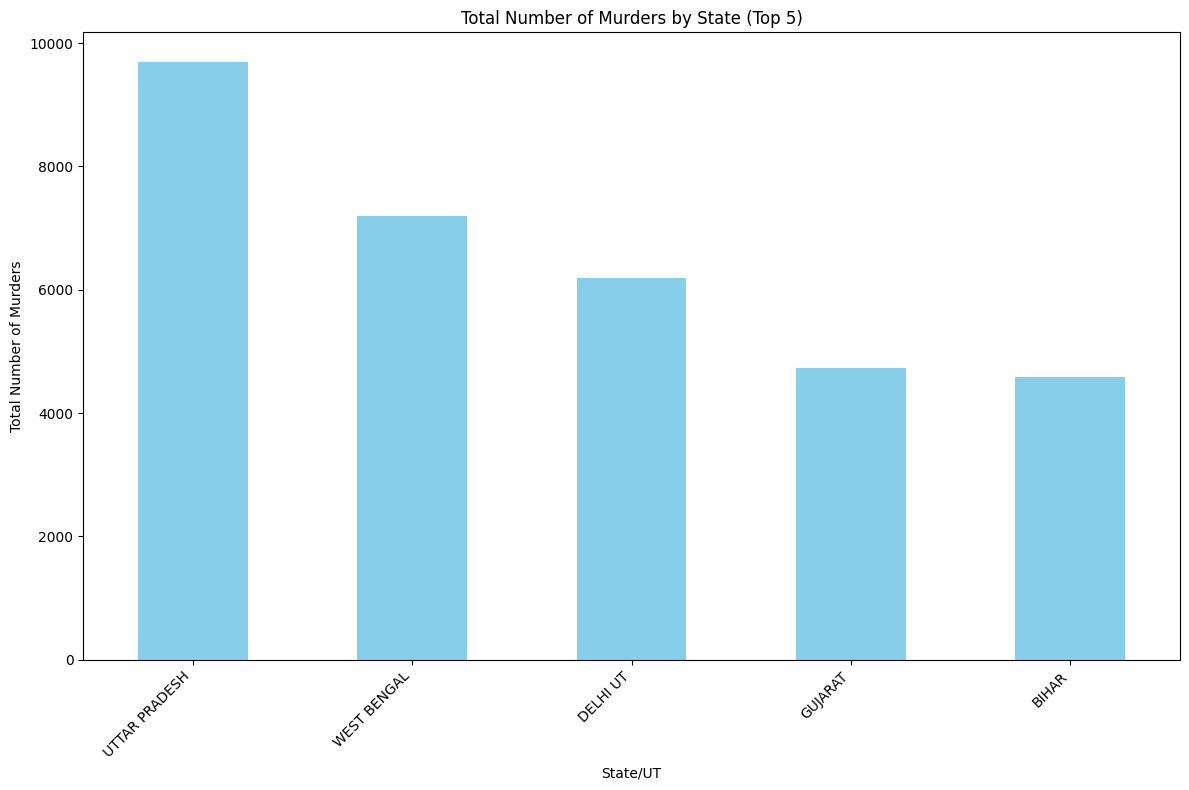

In [15]:
# Selecting the top five states with the highest total number of murders
df_sum = df.groupby('STATE_UT')['MURDERS'].sum()
top5_states = df_sum.nlargest(5)

# Plotting
plt.figure(figsize=(12, 8))
top5_states.plot(kind='bar', color='skyblue')
plt.title('Total Number of Murders by State (Top 5)')
plt.xlabel('State/UT')
plt.ylabel('Total Number of Murders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

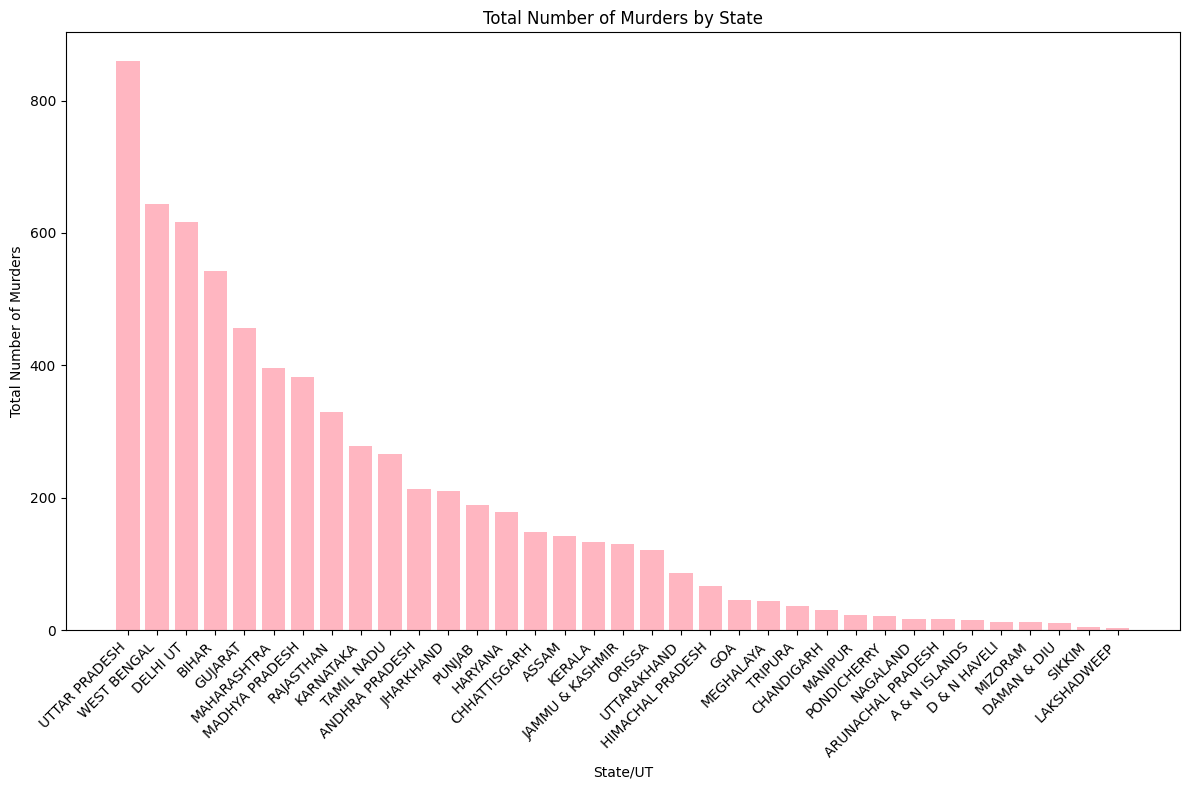

In [28]:
import numpy as np
# Sort the DataFrame by 'MURDERS' column in descending order
df_sorted = df.sort_values(by='MURDERS', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(df_sorted['STATE_UT'], df_sorted['MURDERS'], color='lightpink')
plt.title('Total Number of Murders by State')
plt.xlabel('State/UT')
plt.ylabel('Total Number of Murders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

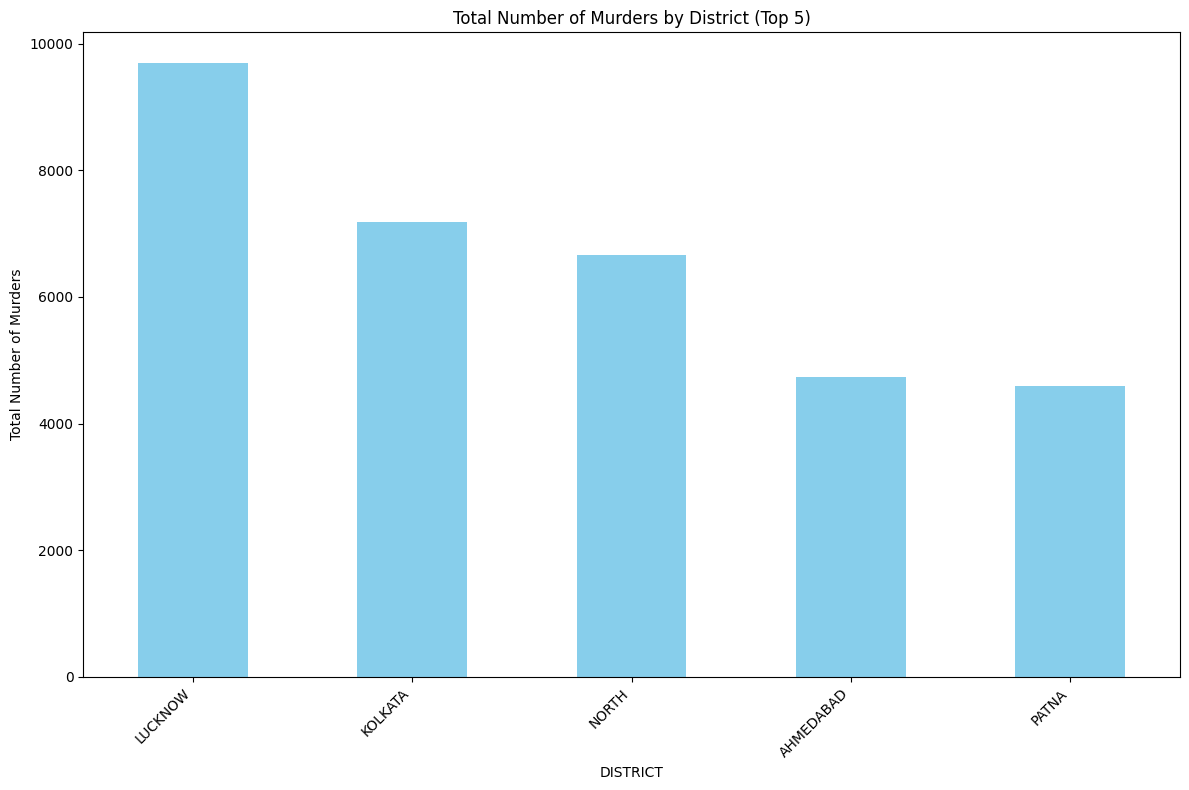

In [30]:
# Selecting the top five districts with the highest total number of murders
df_sum = df.groupby('DISTRICT')['MURDERS'].sum()
top5_Dist = df_sum.nlargest(5)

# Plotting
plt.figure(figsize=(12, 8))
top5_Dist.plot(kind='bar', color='skyblue')
plt.title('Total Number of Murders by District (Top 5)')
plt.xlabel('DISTRICT')
plt.ylabel('Total Number of Murders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

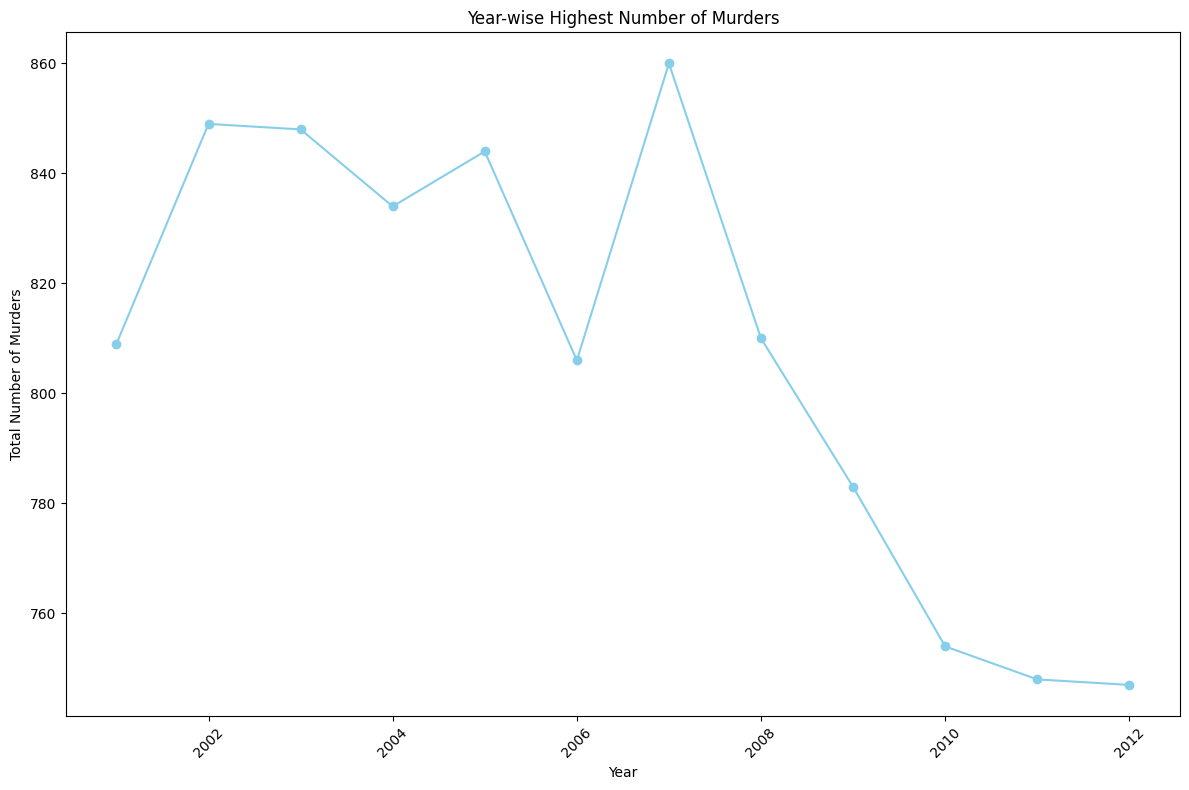

In [31]:
# Find the year-wise highest number of murders
highest_murder_years = df.loc[df.groupby('YEAR')['MURDERS'].idxmax()]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(highest_murder_years['YEAR'], highest_murder_years['MURDERS'], marker='o', color='skyblue')
plt.title('Year-wise Highest Number of Murders')
plt.xlabel('Year')
plt.ylabel('Total Number of Murders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

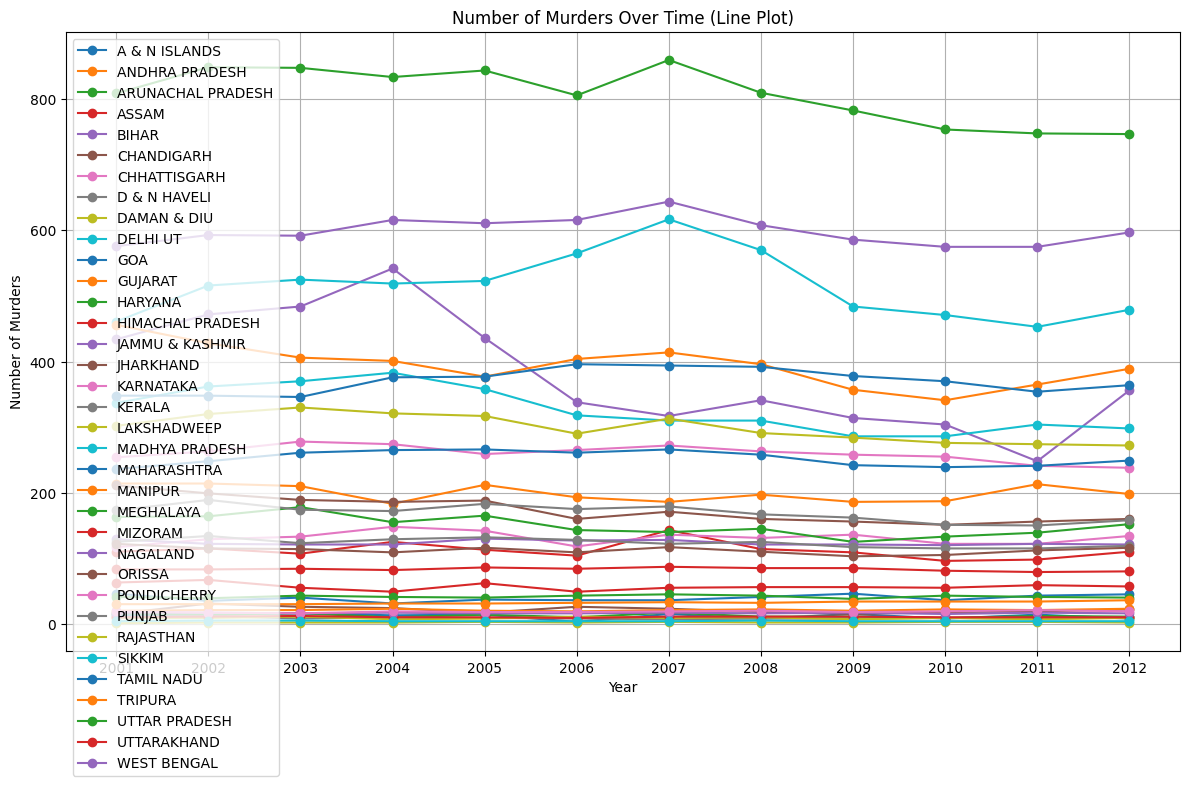

In [32]:
# Plotting
plt.figure(figsize=(12, 8))

for state, group in df.groupby('STATE_UT'):
    plt.plot(group['YEAR'], group['MURDERS'], marker='o', label=state)

plt.title('Number of Murders Over Time (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(df['YEAR'].unique())  # Set x-axis ticks to show all years
plt.tight_layout()
plt.show()